# Biases in Machine Learning Models Using Medical Imaging

In the following experiments we will check if the architecture suggested in
the paper is effective when dealing with MRI scans.
In the first experiment we will run the model on non-biased dataset.
Then we will compare this model performance to model that run on biased dataset to understand how the biased properties 
affecting the performance.
We will then compare to a model that need to eliminate just one bias, a red line that in probability rho measure the size of the
tumor for the glimona type and we will plot a graph of the accuracy depending on rho.
Then we will check the performance of the model when dealing with two biased properties, the red line and a blue polygon that measure the area
of the tumors for the pitutary tumor.


In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from datasets import load_datasets
from transformers import process
from metrics import accuracy
from models import FeatureExtractor, Classifier, SingleBiasDetectorModel, MultipleBiasDetectorModel
from plot import plot_fit
from train import train_and_evaluate
from utils.visualize import merge_results

BATCH_SIZE = 32
NUMBER_OF_EPOCHS = 30

### Experiment Setup:
+ Model: Resnet18 without any bias classifier
+ Dataset: The original brain tumor MRI scans without bias
+ Optimizer: Adam optimizer
+ Loss: Cross entropy loss
+ Success metric: Accuracy

cache/ds_train_0_0.pkl already exists.
Max test accuracy: 0.9567


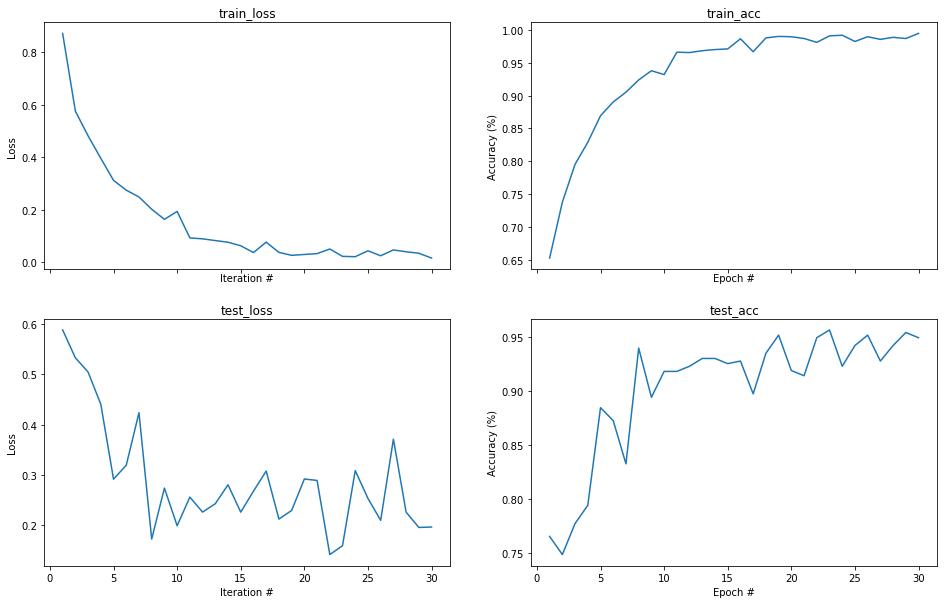

In [3]:
no_bias_ds_train, no_bias_ds_test = load_datasets(rho=0, gamma=0)
no_bias_dl_train = torch.utils.data.DataLoader(no_bias_ds_train, BATCH_SIZE,  collate_fn=process, shuffle=True)
no_bias_dl_test = torch.utils.data.DataLoader(no_bias_ds_test, BATCH_SIZE,  collate_fn=process, shuffle=False)
feature_extractor = FeatureExtractor()
primary_classifier = Classifier(output_dim=3)
model = nn.Sequential(feature_extractor, primary_classifier).to("cuda")
cross_entropy_loss_fn = nn.CrossEntropyLoss() 
loss_functions = [lambda scores, labels, biases: cross_entropy_loss_fn(scores, labels.to("cuda"))]
accuracy_fn = lambda scores, labels, biases: accuracy(scores, labels.to("cuda"))
optimizer = Adam(model.parameters())
results = train_and_evaluate(NUMBER_OF_EPOCHS, model, optimizer, loss_functions, accuracy_fn, no_bias_dl_train, no_bias_dl_test)
plot_fit(results)
print(f"Max test accuracy: {round(max(results.test_acc), 4)}")


### Experiment Setup:
+ Model: Resnet18 without any bias classifier
+ Dataset: The original brain tumor MRI scans with bias rho=1, gamma=1
+ Optimizer: Adam optimizer
+ Loss: Cross entropy loss
+ Success metric: Accuracy

cache/ds_train_1_1.pkl already exists.
Max test accuracy: 0.6715


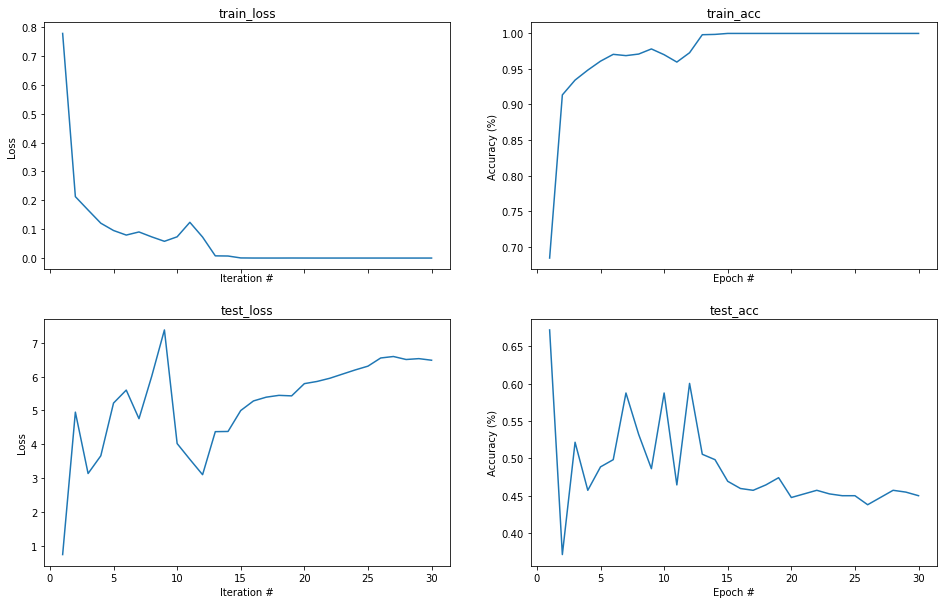

In [5]:
bias_ds_train, no_bias_ds_test = load_datasets(rho=1, gamma=1)
bias_dl_train = torch.utils.data.DataLoader(bias_ds_train, BATCH_SIZE, collate_fn=process, shuffle=True)
no_bias_dl_test = torch.utils.data.DataLoader(no_bias_ds_test, BATCH_SIZE,  collate_fn=process, shuffle=False)
feature_extractor = FeatureExtractor()
primary_classifier = Classifier(output_dim=3)
model = nn.Sequential(feature_extractor, primary_classifier).to("cuda")
cross_entropy_loss_fn = nn.CrossEntropyLoss() 
loss_functions = [lambda scores, labels, biases: cross_entropy_loss_fn(scores, labels.to("cuda"))]
accuracy_fn = lambda scores, labels, biases: accuracy(scores, labels.to("cuda"))
optimizer = Adam(model.parameters())
results = train_and_evaluate(NUMBER_OF_EPOCHS, model, optimizer, loss_functions, accuracy_fn, bias_dl_train, no_bias_dl_test)
plot_fit(results)
print(f"Max test accuracy: {round(max(results.test_acc), 4)}")

### Experiment Setup:
This experiment check the effect of the bias with different rho values.
We want to check if the model can learn to ignore the biased properties 
if they don't exist in all of the images.

+ Model: Resnet18 without any bias classifier
+ Dataset: The original brain tumor MRI scans with bias rho=1, gamma=0
+ Optimizer: Adam optimizer
+ Loss: Cross entropy loss
+ Success metric: Accuracy

In [8]:
all_results = []
def run_experiment_with_rho_value(rho):
    bias_ds_train, no_bias_ds_test = load_datasets(rho=rho, gamma=0)
    bias_dl_train = torch.utils.data.DataLoader(bias_ds_train, BATCH_SIZE, collate_fn=process, shuffle=True)
    no_bias_dl_test = torch.utils.data.DataLoader(no_bias_ds_test, BATCH_SIZE, collate_fn=process, shuffle=False)
    feature_extractor = FeatureExtractor()
    primary_classifier = Classifier(output_dim=3)
    model = nn.Sequential(feature_extractor, primary_classifier).to("cuda")
    cross_entropy_loss_fn = nn.CrossEntropyLoss() 
    loss_functions = [lambda scores, labels, biases: cross_entropy_loss_fn(scores, labels.to("cuda"))]
    accuracy_fn = lambda scores, labels, biases: accuracy(scores, labels.to("cuda"))
    optimizer = Adam(model.parameters())
    results = train_and_evaluate(NUMBER_OF_EPOCHS, model, optimizer, loss_functions, accuracy_fn, bias_dl_train, no_bias_dl_test)
    print(f"Max test accuracy rho={round(rho, 2)}: {round(max(results.test_acc), 4)}")
    return results

In [9]:
# Rho equal 0.5
all_results.append(run_experiment_with_rho_value(0.5))

cache/ds_train_0.5_0.pkl already exists.
Max test accuracy rho=0.5: 0.9567


In [10]:
# Rho equal 0.6
all_results.append(run_experiment_with_rho_value(0.6))

cache/ds_train_0.6_0.pkl already exists.
Max test accuracy rho=0.6: 0.9591


In [11]:
# Rho equal 0.7
all_results.append(run_experiment_with_rho_value(0.7))

cache/ds_train_0.7_0.pkl already exists.
Max test accuracy rho=0.7: 0.9447


In [12]:
# Rho equal 0.8
all_results.append(run_experiment_with_rho_value(0.8))

cache/ds_train_0.8_0.pkl already exists.
Max test accuracy rho=0.8: 0.9111


In [13]:
# Rho equal 0.9
all_results.append(run_experiment_with_rho_value(0.9))

Data directory already exists.  if from some reason the data directory structure is wrong please remove the data dir and rerun this script
Max test accuracy rho=0.9: 0.8389


In [14]:
# Rho equal 1.0
all_results.append(run_experiment_with_rho_value(1.))

Data directory already exists.  if from some reason the data directory structure is wrong please remove the data dir and rerun this script
Max test accuracy rho=1.0: 0.6739


(<Figure size 1152x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'train_loss'}, xlabel='Iteration #', ylabel='Loss'>,
        <AxesSubplot:title={'center':'train_acc'}, xlabel='Epoch #', ylabel='Accuracy (%)'>,
        <AxesSubplot:title={'center':'test_loss'}, xlabel='Iteration #', ylabel='Loss'>,
        <AxesSubplot:title={'center':'test_acc'}, xlabel='Epoch #', ylabel='Accuracy (%)'>],
       dtype=object))

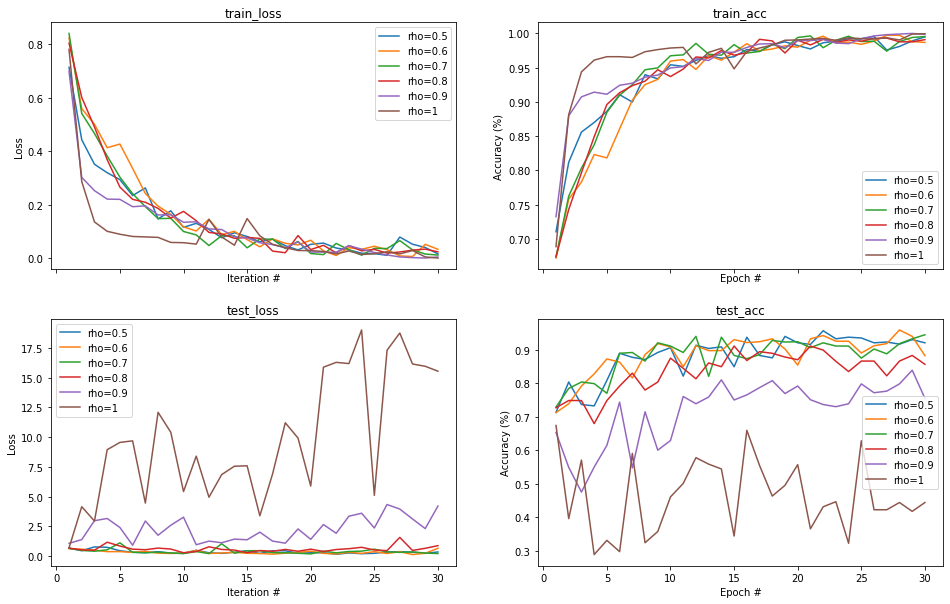

In [18]:
rho_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
plot_fit(merge_results(all_results), 
         legend=[f"rho={rho}" for rho in rho_values])

### Experiment Setup:
In the next experiment we check if the architecture suggested in the paper "Learning Not to Learn" by Kim et al
can mitigate the effect of the biased property of the red measurement line 

+ Model: Resnet18 with bias classifier for the red measurement line
+ Dataset: The original brain tumor MRI scans with bias rho=1, gamma=0
+ Optimizer: Adam optimizer
+ Loss: Cross entropy loss + Binary loss for the bias
+ Success metric: Accuracy

cache/ds_train_1_0.pkl already exists.
Max test accuracy: 0.9231


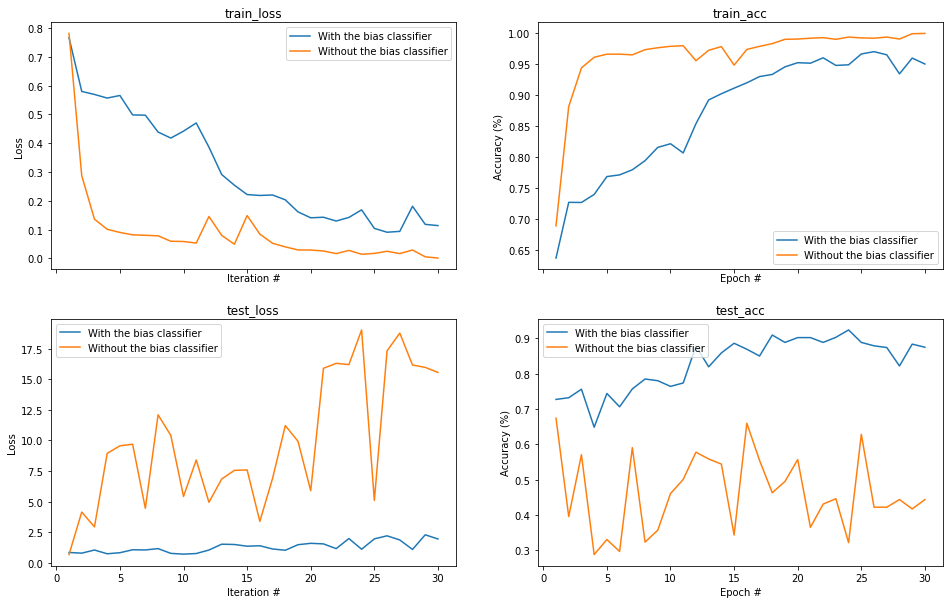

In [15]:
bias_ds_train, no_bias_ds_test = load_datasets(rho=1, gamma=0)
bias_dl_train = torch.utils.data.DataLoader(bias_ds_train, BATCH_SIZE, collate_fn=process, shuffle=True)
no_bias_dl_test = torch.utils.data.DataLoader(no_bias_ds_test, BATCH_SIZE, collate_fn=process, shuffle=False)
model = SingleBiasDetectorModel().to("cuda")
cross_entropy_loss_fn = nn.CrossEntropyLoss()
binary_loss_fn = nn.BCEWithLogitsLoss()
loss_functions = [
    lambda scores, labels, biases: cross_entropy_loss_fn(scores[0], labels.to("cuda")),
    lambda scores, labels, biases: binary_loss_fn(scores[1], biases.to("cuda")),
]
accuracy_fn = lambda scores, labels, biases: accuracy(scores[0], labels.to("cuda"))
optimizer = Adam(model.parameters())
results = train_and_evaluate(NUMBER_OF_EPOCHS,
                             model,
                             optimizer,
                             loss_functions,
                             accuracy_fn,
                             bias_dl_train,
                             no_bias_dl_test)
with_the_bias_classifier = results
without_the_bias_classifier = all_results[-1]
plot_fit(merge_results([with_the_bias_classifier, without_the_bias_classifier]), 
         legend=["With the bias classifier", "Without the bias classifier"])
print(f"Max test accuracy: {round(max(results.test_acc), 4)}")

### Experiment Setup:
The last experiment checks if the model can handle multiple bias properties.
We will add the blue polygon with the red line and see if two 
classifiers can simultaneously make the feature extractor to ignore those properties
+ Model: Resnet18 with bias classifier for the red measurement line and bias classifier for the blue polygon
+ Dataset: The original brain tumor MRI scans with bias rho=1, gamma=0
+ Optimizer: Adam optimizer
+ Loss: Cross entropy loss + Binary loss for the red line and for the blue polygon
+ Success metric: Accuracy

cache/ds_train_1_1.pkl already exists.
cache//ds_test_0_0.pkl already exists.
Max test accuracy: 0.9111


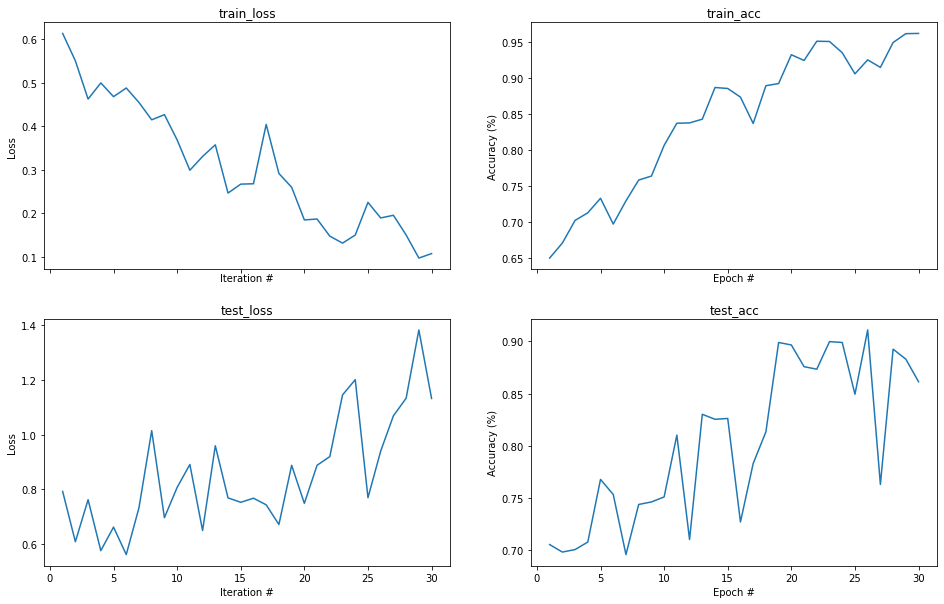

In [2]:
bias_ds_train, no_bias_ds_test = load_datasets(rho=1, gamma=1)
bias_dl_train = torch.utils.data.DataLoader(bias_ds_train, BATCH_SIZE, collate_fn=process, shuffle=True)
no_bias_dl_test = torch.utils.data.DataLoader(no_bias_ds_test, BATCH_SIZE, collate_fn=process, shuffle=False)
model = MultipleBiasDetectorModel().to("cuda")
cross_entropy_loss_fn = nn.CrossEntropyLoss()
binary_loss_fn = nn.BCEWithLogitsLoss()
loss_functions = [
    lambda scores, labels, biases: cross_entropy_loss_fn(scores[0], labels.to("cuda")),
    lambda scores, labels, biases: binary_loss_fn(scores[1], ((labels == 0).float() * biases).to("cuda")),
    lambda scores, labels, biases: binary_loss_fn(scores[2], ((labels == 2).float() * biases).to("cuda")),
]
accuracy_fn = lambda scores, labels, biases: accuracy(scores[0], labels.to("cuda"))
optimizer = Adam(model.parameters())
results = train_and_evaluate(NUMBER_OF_EPOCHS,
                             model,
                             optimizer,
                             loss_functions,
                             accuracy_fn,
                             bias_dl_train,
                             no_bias_dl_test)
plot_fit(results)
print(f"Max test accuracy: {round(max(results.test_acc), 4)}")
